# Loan 

## by (Pham Minh Nhat Anh )

## Preliminary Wrangling

> Briefly introduce your dataset here.

# Questions 
##### 1)What factors affect a loan’s outcome status?


##### 2)What affects the borrower’s APR or interest rate?


##### 3)Are there differences between loans depending on how large the original loan amount was?

### What is the structure of your dataset?

There are total of 113937 loans entries saved in the dataset and 81 attributes. Each loan contain information on the borrowered's background information and details regarding the loans
### What is/are the main feature(s) of interest in your dataset?
The Borrower's APR will be analyzied with many factors such as the borrower's rating, score, occupation and income that could influence change in borrower's APR.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

The Prosper Rating and score could show low Borrower's APR because higher rating reflect the borrower's personality to be more trustworthy. Creditscore could also have similar effect on Borrower's APR as Prosper Rating.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np
%matplotlib inline

In [2]:
df=pd.read_csv("loan.csv")
df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
ListingKey                             113937 non-null object
ListingNumber                          113937 non-null int64
ListingCreationDate                    113937 non-null object
CreditGrade                            28953 non-null object
Term                                   113937 non-null int64
LoanStatus                             113937 non-null object
ClosedDate                             55089 non-null object
BorrowerAPR                            113912 non-null float64
BorrowerRate                           113937 non-null float64
LenderYield                            113937 non-null float64
EstimatedEffectiveYield                84853 non-null float64
EstimatedLoss                          84853 non-null float64
EstimatedReturn                        84853 non-null float64
ProsperRating (numeric)                84853 non-null float64
ProsperRating (Alpha) 

In [4]:
# copy another version to avoid mistake
df1=df.copy()
# drop columns to get necessary data
df1.drop(['ListingKey', 'ListingNumber', 'ListingCreationDate', 'ClosedDate', 'CurrentlyInGroup',
          'GroupKey', 'DateCreditPulled', 'FirstRecordedCreditLine', 
          'LoanKey', 'TotalProsperLoans', 'TotalProsperPaymentsBilled', 
          'OnTimeProsperPayments', 'ProsperPaymentsLessThanOneMonthLate',
          'ProsperPaymentsOneMonthPlusLate', 'ProsperPrincipalBorrowed', 
          'ProsperPrincipalOutstanding', 'ScorexChangeAtTimeOfListing',
          'LoanCurrentDaysDelinquent', 'LoanFirstDefaultedCycleNumber',
          'AmountDelinquent','DelinquenciesLast7Years','PublicRecordsLast10Years',
          'PublicRecordsLast12Months','LP_CustomerPayments','LP_CustomerPrincipalPayments',
          'LP_InterestandFees', 'LP_ServiceFees','LP_CollectionFees','LP_GrossPrincipalLoss',
          'LP_NetPrincipalLoss','LP_NonPrincipalRecoverypayments' ], axis=1, inplace = True)
# show the important varible after remove columns
df1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 50 columns):
CreditGrade                           28953 non-null object
Term                                  113937 non-null int64
LoanStatus                            113937 non-null object
BorrowerAPR                           113912 non-null float64
BorrowerRate                          113937 non-null float64
LenderYield                           113937 non-null float64
EstimatedEffectiveYield               84853 non-null float64
EstimatedLoss                         84853 non-null float64
EstimatedReturn                       84853 non-null float64
ProsperRating (numeric)               84853 non-null float64
ProsperRating (Alpha)                 84853 non-null object
ProsperScore                          84853 non-null float64
ListingCategory (numeric)             113937 non-null int64
BorrowerState                         108422 non-null object
Occupation                          

## I)Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

## 1)What factor affect the loan status ?


In [5]:
# count variable 
status_count=df1["LoanStatus"].value_counts()
status_count

Current                   56576
Completed                 38074
Chargedoff                11992
Defaulted                  5018
Past Due (1-15 days)        806
Past Due (31-60 days)       363
Past Due (61-90 days)       313
Past Due (91-120 days)      304
Past Due (16-30 days)       265
FinalPaymentInProgress      205
Past Due (>120 days)         16
Cancelled                     5
Name: LoanStatus, dtype: int64

### Loan Status 

Text(0.5, 0, 'proportion of Loan Status')

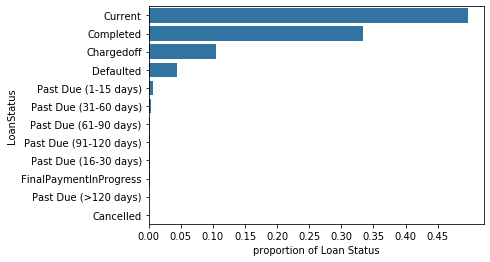

In [6]:
# get in order to rank 
status_order=df1["LoanStatus"].value_counts().index
status_order

# get shape to caculate relative frequence
n_status=df1["LoanStatus"].shape[0]
n_status

max_status=status_count[0]
max_status

# get the proportion of each bar chart 
max_pro=max_status/n_status
max_pro

# get tick for bar chart
tick_pro=np.arange(0,max_pro,0.05)

# get tick name 
tick_names=['{:0.2f}'.format(v) for v in tick_pro]
tick_names

# draw bar chart 
base_color=sb.color_palette()[0]
sb.countplot( data=df1,y="LoanStatus",color=base_color,order=status_order)
plt.xticks(tick_pro*n_status,tick_names)
plt.xlabel('proportion of Loan Status')

-**Choose 4 significant variables of income to plot which is `Current` , `Completed`,`Chargedoff`,`Defaulted` to plot bivate charts**

Monthly income , monly payment , bank card credit

### Occupation
**Because the Occupation is large so I need to put the chart horizontal and scale down the y axis by log**

([<matplotlib.axis.XTick at 0x19ea9b0be48>,
 <a list of 3 Text xticklabel objects>)

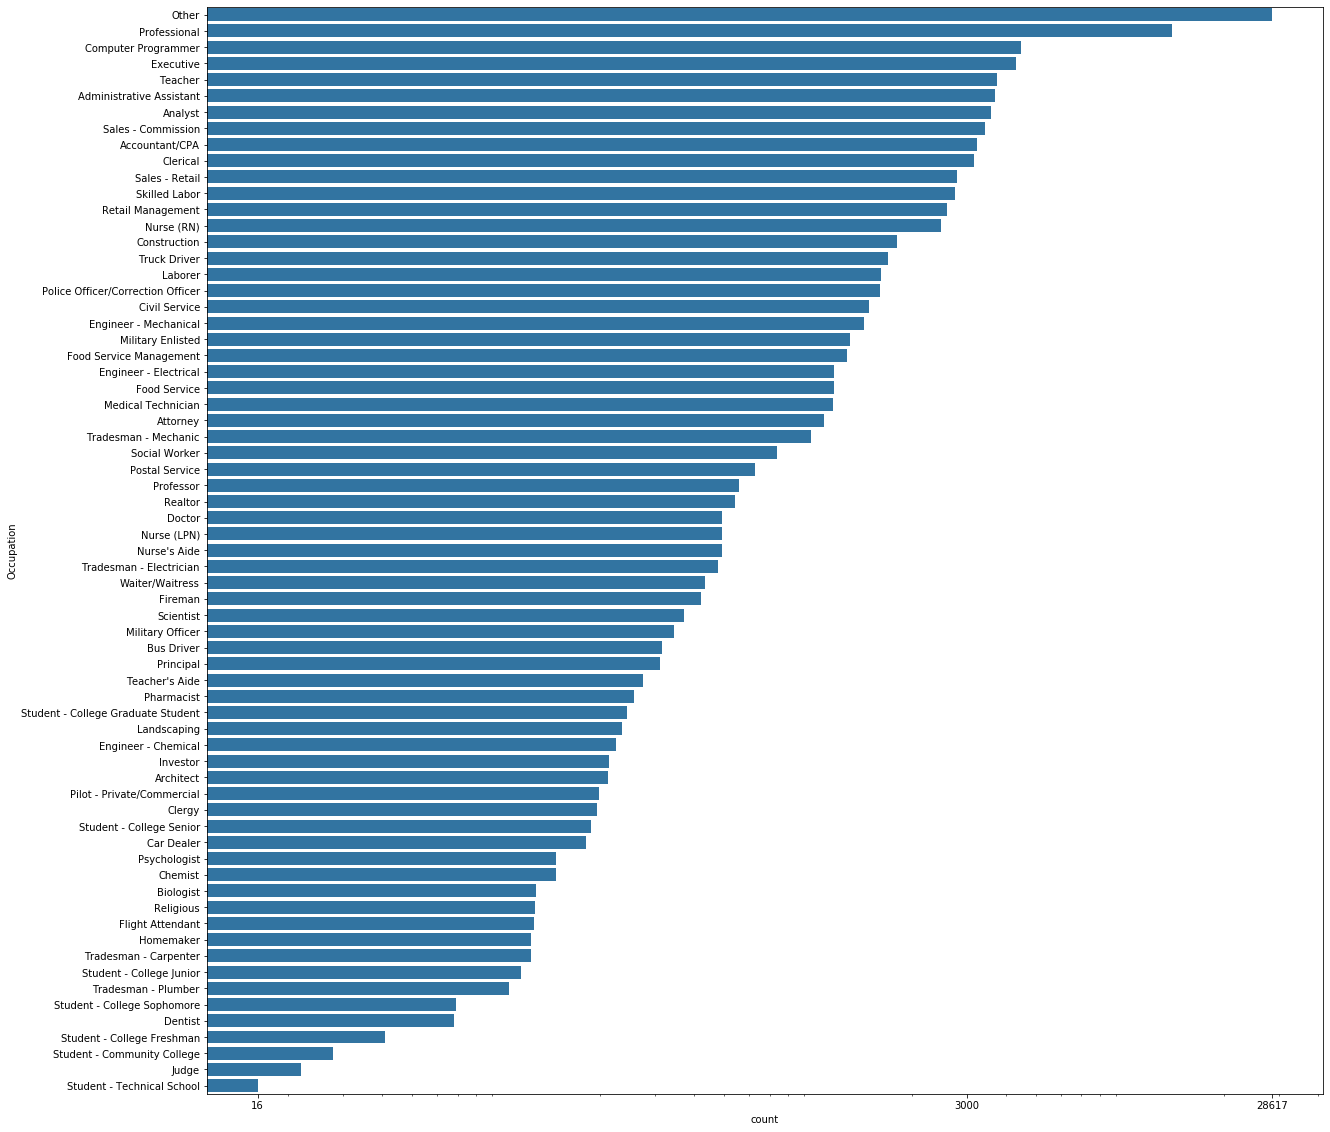

In [13]:
#set value for ticks
Occupation_value=df1["Occupation"].value_counts()
ticks = [Occupation_value.min(),Occupation_value.max(), 3000]
labels = ['{}'.format(val) for val in ticks]
#increase the space for the plot
plt.figure(figsize=(20,20))
# set color 
base_color=sb.color_palette()[0]
# plot bar
g=sb.countplot(data=df1, y="Occupation", color=base_color,order=Occupation_order)
# set log scale to see all the range of occupation data 
g.set(xscale="log")
plt.xticks(ticks, labels)

### Credit Grade

In [ ]:
# get order for credit 
credit_order=df1["CreditGrade"].value_counts().index
#plot
g=sb.countplot(data=df1, y="CreditGrade", color=base_color,order=credit_order)

**AA: high credit quality , A: acceptable safety , B: low safety , D : lowest safety , NC: not competed, there are alot customers have hight risk , need to becareful**

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> Your answer here!

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Your answer here!

Many people are currently in loan 

## II)Bivariate Exploration
> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

#### Factors usually effect Loan include income, employment history , debt you own , apply for loan recently ,collateral , investment , monthly loan payment  

### Loan Status with Monthly payment 

In [ ]:
# violin plot 
plt.figure(figsize=(20,20))
base_color=sb.color_palette()[0]
sb.boxplot(data=df,x="MonthlyLoanPayment",y="LoanStatus",color=base_color, order=status_order)
plt.xticks(rotation=15)

**Most of people in debt and people who past the dueday pay more often than others**

### Investor and loan status 

In [ ]:
# boxplot 
plt.figure(figsize=(15,15))
base_color=sb.color_palette()[0]
sb.boxplot(data=df,x="LoanStatus",y="Investors",color=base_color, order=status_order)
plt.xticks(rotation=15)

**Completed loan has the most investor and ouliers , while people who are in debt have the lowest invest, the other variables have realtive same mean of investors**

### Income with Loan Status 


In [ ]:
# groupby to see counts of 2 catergorical variable
income_status=df1.groupby(["LoanStatus",'IncomeRange']).size()
# create table
income_status=income_status.reset_index(name="count")
# make pivot table 
income_status.pivot(index="LoanStatus",columns="IncomeRange",values="count")


#plot
plt.figure(figsize=(5,5))

income_status_sub = df1.loc[df1['LoanStatus'].isin(['Current','Completed','Chargedoff','Defaulted'])]

ax = sb.countplot(data=income_status_sub, x='LoanStatus', hue='IncomeRange')
# legend top right
ax.legend(loc=1, framealpha=1, title='IncomeRange') 
plt.xticks(rotation=15)

**People who have high income range would around '25k- 49k' dollar rank the 1st in complete and charged off the debt, most of current loan is owned by the middle income '50k - 79k' dollar , and default group most of them doesn't show income, middle income people borrow alot **

## 2)Difference between Loans depending on how large the OriginalLoan amount?  

In [ ]:
# boxplot 
plt.figure(figsize=(15,15))
base_color=sb.color_palette()[0]
sb.boxplot(data=df,x="LoanStatus",y="LoanOriginalAmount",color=base_color, order=status_order)
plt.xticks(rotation=15)

**people how are curently in debt have really huge amount of oringial Loan amount**

## 3)What factors affect APR 
>APR la interestrate + origination fee adn docuemtnation fee, provide yearly rate

### BorrowerAPR and Loan Status 

In [ ]:
# plotting
base_color = sb.color_palette()[0]
sb.barplot(data = df1, x = 'BorrowerAPR', y = 'LoanStatus',
               color = base_color, order =status_order, ci = 'sd')
plt.xlabel(' BorrowerAPR (% a year)')


**Charged off customers adn pastdue customers have the highest BorrowerAPR rate**

### Borrower APR vs Occupation 

In [ ]:
#put order by group 
ob_mean=df1.groupby(["Occupation"])["BorrowerAPR"].mean()
#create a table for group by mean of BorrowerAPR 
ob_mean=ob_mean.reset_index(name="Mean")
# sort value of Borrower's mean 
ob_mean=ob_mean.sort_values(by='Mean',ascending=False)
ob_mean

In [ ]:
# plotting
plt.figure(figsize=(15,15))
base_color= sb.color_palette()[3]
sb.barplot(data = df1, x = 'BorrowerAPR', y = 'Occupation', color=base_color)
plt.xlabel(' BorrowerAPR (% a year)')

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Your answer here!

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?


## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

To get a correlation we need to convert our categorical features to numerical ones.

In [ ]:
df1['LoanStatus'] =df['LoanStatus'].astype('category').cat.codes
df1['ProsperRating (Alpha)'] =df['ProsperRating (Alpha)'].astype('category').cat.codes
df1['BorrowerState'] =df['BorrowerState'].astype('category').cat.codes
df1['Occupation'] =df['Occupation'].astype('category').cat.codes
df1['IncomeRange'] =df['IncomeRange'].astype('category').cat.codes
df1['LoanOriginationDate'] =df['LoanOriginationDate'].astype('category').cat.codes
df1['LoanOriginationQuarter'] =df['LoanOriginationQuarter'].astype('category').cat.codes
df1['MemberKey'] =df['MemberKey'].astype('category').cat.codes
df1['EmploymentStatus'] =df['EmploymentStatus'].astype('category').cat.codes

Now we can get the correlation between the 'BorrowerAPR' and all the other features.

In [ ]:
heatmap=df1[df1.columns[1:]].corr()['BorrowerAPR'][:]

In [ ]:
f, ax = plt.subplots(figsize=(15, 15))
ax=sb.heatmap(heatmap.to_frame(),annot=True, annot_kws={'size':10},cmap="GnBu")
plt.show()

**-There is as strong positve relationship amoung `BorrowerARP`: with `EstimateEffectiveYield`,`LenderYield`,`EstimateLoss`,`EstimateReturn`,`ProsperRating(Alpha)`**

In [ ]:
heatmap=df1[df1.columns[1:]].corr()['LoanStatus'][:]

f, ax = plt.subplots(figsize=(15, 15))
ax=sb.heatmap(heatmap.to_frame(),annot=True, annot_kws={'size':10},cmap="GnBu")
plt.show()

### Occupation with Status and Creditgrade

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> It is clear to use correlation to check which variable related the most to analyse data first then look at the detail each variable

### Were there any interesting or surprising interactions between features?

> Your answer here!

In [ ]:
import pandas_profiling
pandas_profiling.ProfileReport(df)

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!